In [162]:
import time 
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from scipy.integrate import odeint
plt.style.use('seaborn-dark')

## Ejercicio 1

En primera instancia, utilizaremos el siguiente código para calcular la constante de Madelung.


In [ ]:
#definimos las funciones
def signo(x,y,z):
    return (-1)**(x+y+z)
def distancia(x,y,z):
    return np.sqrt(x**2+y**2+z**2)

#valores de los coeficientes
n_1=np.arange(-300,301,dtype=np.float32)
n_2=np.arange(-300,301,dtype=np.float32)
n_3=np.arange(-300,301,dtype=np.float32)

#ciclo para el calculo
M=0
start=time.time()
for i in n_1:
    for j in n_2:
        for k in n_3:
            if i==0:
                if j==0:
                    if k==0:
                        continue 
            xd=signo(i,j,k)/distancia(i,j,k)
            M+=xd
end=time.time()
print("el valor estimado de M es "+str(M)+", esta estimación demoró "+str(end-start)+ " segundos en calcular")

Este código para calcular la constante nos entrega un valor de $\sim -1.7456$ en un tiempo de $\sim 45$ minutos.

## Ejercicio 3

Antes de graficar el campo eléctrico, debemos conocer las derivadas con respecto a $x$ e $y$ del potencial $\phi$. Es por ello que para calcular la derivada con respecto a $y$ utilizaremos el módulo sympy, sin embargo, para la derivada respecto a $x$ existe un cálculo explicito en el aparatado (d) de la tarea, por lo tanto, para el desarrollo de este código lo sacaremos explicitamente de ahí.

In [163]:
#definimos los símbolos que utilizaremos
x = sp.Symbol('x', real=True)
y = sp.Symbol('y', real=True)
z = sp.Symbol('z', real=True)
d = sp.Symbol('d', real=True)
p = sp.Symbol('p', real=True)

In [164]:
phi = ((p*(x-d))/(((x-d)**2)+y**2+z**2)**(3/2)) + ((p*(x+d))/(((x+d)**2)+y**2+z**2)**(3/2))#potencial obtenido en a
phi

p*(-d + x)*(y**2 + z**2 + (-d + x)**2)**(-1.5) + p*(d + x)*(y**2 + z**2 + (d + x)**2)**(-1.5)

In [165]:
sp.simplify(sp.diff(phi,y)) #derivada respecto a y

3.0*p*y*(d - x)*(y**2 + z**2 + (d - x)**2)**(-2.5) - 3.0*p*y*(d + x)*(y**2 + z**2 + (d + x)**2)**(-2.5)

Teniendo ya ambas derivadas del potencial, podemos definir nuestro campo eléctrico en el plano $xy$ que sería, 

$\vec{E}(x,y) = -\nabla \phi =\frac{p}{4\pi \epsilon_o} \left[ \left(\frac{2(d-x)^2-y^2}{((d-x)^2+y^2)^{^5/_2}} + \frac{2(x+d)^2-y^2}{((x+d)^2+y^2)^{^5/_2}}\right) \hat{x} + \left(\frac{3y(x-d)}{((x-d)^2+y^2)^{^5/_2}} + \frac{3y(x+d)}{((x+d)^2+y^2)^{^5/_2}}\right) \hat{y} \right]$

Posteriormente, podemos realizar el código para graficar el campo eléctrico.

In [166]:
##CAMPO ELECTRICO##

n = 22 #nodos de la grilla
max = 22 #maximo y minimo del grafico

X = np.linspace(0,max,n)
Y = np.linspace(-max,max,n)
d = 11  #Largo de la línea de carga
p = 1

x,y = np.meshgrid(X,Y)

def Ex(x,y): #componente x del campo
    return (p*(2*(d-x)**2-y**2))/(((d-x)**2+y**2)**(5/2)) + (p*(2*(x+d)**2-y**2))/(((x+d)**2+y**2)**(5/2))
    #la expresión anterior se obtiene al hacer que el output de sympy nos de la expresión para el campo en un texto 'plano'

def Ey(x,y): #componente y del campo
    return (3*p*y*(x-d))/(((x-d)**2+y**2)**(5/2)) + (3*p*y*(x+d))/(((x+d)**2+y**2)**(5/2)) 

def E(x,y): #normalización
    return np.sqrt((Ex(x,y))**2 + (Ey(x,y))**2)

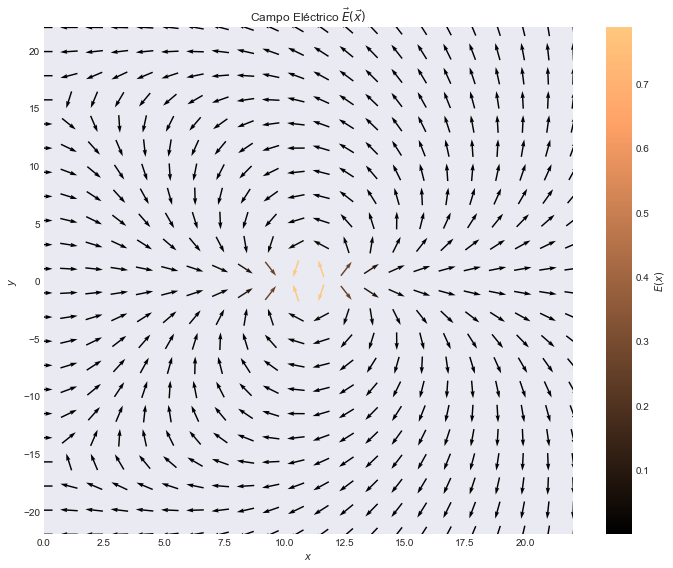

In [167]:
## Plot del campo eléctrico
plt.figure(figsize=(10,8))
plt.quiver(x,y, Ex(x,y)/E(x,y),Ey(x,y)/E(x,y),E(x,y), scale=30, pivot='middle', cmap= 'copper')
plt.ylabel(r'$y$')
plt.xlabel(r'$x$')
plt.colorbar(label=r'$E(x)$')
plt.xlim(0,max)#limites arbitrarios para una mejor visualización del campo
plt.ylim(-max,max)
plt.title(r'Campo Eléctrico $\vec{E}(\vec{x})$')
plt.tight_layout()

Luego, podemos añadirle al gráfico anterior algunas curvas equipotenciales representativas del problema con el siguiente código.

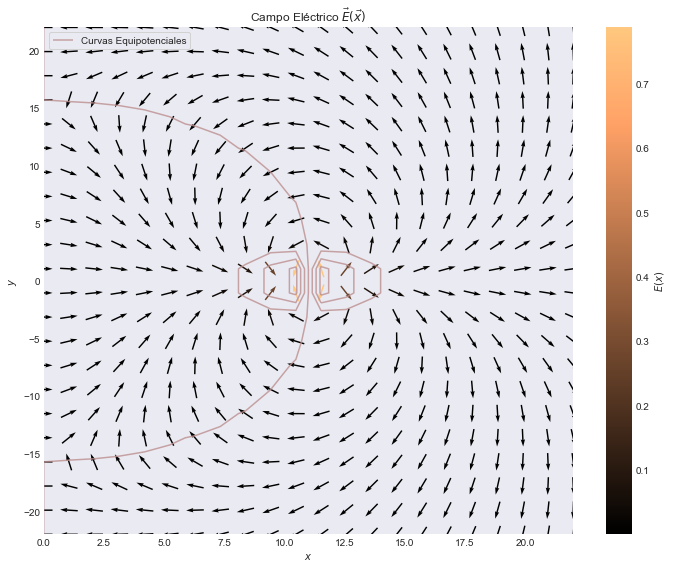

In [168]:
##LINEAS EQUIPOTENCIALES##

def P(x): #potencial encontrado en a respecto a x e y
    return (p*(x-d))/(((x-d)**2+y**2)**(3/2)) + (p*(x+d))/(((x+d)**2+y**2)**(3/2))

plt.figure(figsize=(10,8))
plt.quiver(x,y, Ex(x,y)/E(x,y),Ey(x,y)/E(x,y),E(x,y), scale=30, pivot='middle', cmap= 'copper')
plt.ylabel(r'$y$')
plt.xlabel(r'$x$')
plt.colorbar(label=r'$E(x)$')
plt.xlim(0,max)
plt.ylim(-max,max)
plt.title(r'Campo Eléctrico $\vec{E}(\vec{x})$')
plt.tight_layout()
CS=plt.contour(x,y,P(x), levels=7,colors='rosybrown', linestyles='-', alpha=0.8)
CS.collections[0].set_label('Curvas Equipotenciales')
plt.legend(frameon=True, loc='upper left')

Finalmente, creamos 2 gráficos, uno 2D y otro 3D, con el fin de mostrar el comportamiento de la densidad de carga inducida en el plano $yz$ del conductor.


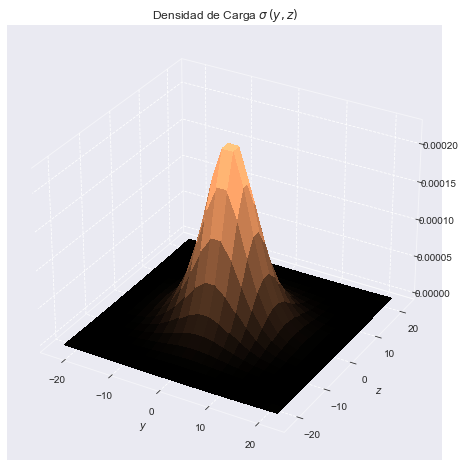

In [169]:
## DENSIDAD DE CARGA ##

## PLOT 3D

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(projection='3d') 
cmap=cm.copper

Y = np.linspace(-max,max,n)
Z = np.linspace(-max,max,n)

y,z = np.meshgrid(Y,Z)

sigma=((p/(2*np.pi)))*((2*d**2-y**2-z**2)/((d**2+y**2+z**2)**(5/2)))
 
surf=ax.plot_surface(y,z,sigma, cmap=cmap, linewidth=0, antialiased=False)

plt.ylabel(r'$z$')
plt.xlabel(r'$y$')
plt.title(r'Densidad de Carga $\sigma \, (y,z) $')

##Ajustes de estética del gráfico
##color de los limites del grafico##
ax.xaxis.pane.set_edgecolor('white')
ax.yaxis.pane.set_edgecolor('white')
ax.zaxis.pane.set_edgecolor('white')
##fondo blanco##
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False
##tipo de linea grilla##
ax.zaxis._axinfo["grid"]['linestyle'] = "--"
ax.yaxis._axinfo["grid"]['linestyle'] = "--"
ax.xaxis._axinfo["grid"]['linestyle'] = "--"

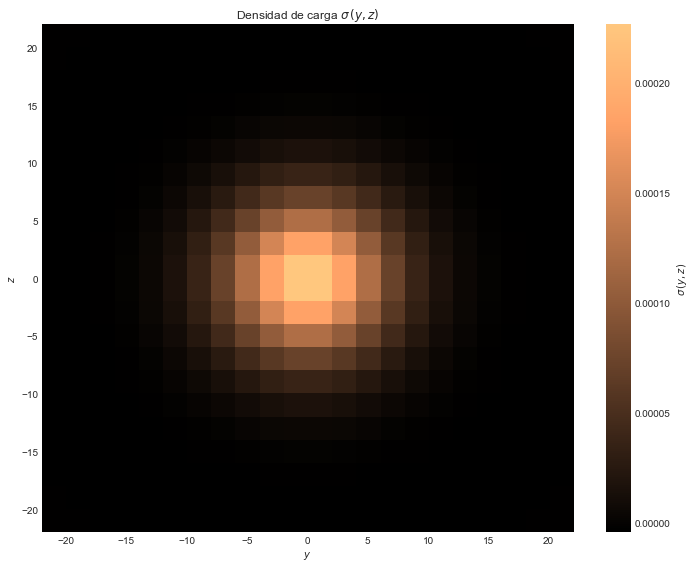

In [170]:
##PLOT 2D

Y = np.linspace(-max,max,n)
Z = np.linspace(-max,max,n)

y,z = np.meshgrid(Y,Z)
sigma=((p/(2*np.pi)))*((2*d**2-y**2-z**2)/((d**2+y**2+z**2)**(5/2)))

plt.figure(figsize=(10,8))
plt.imshow(sigma, cmap='copper', norm=None, aspect='auto', filternorm=False, extent=[-max,max,-max,max])
plt.ylabel(r'$z$')
plt.xlabel(r'$y$')
plt.colorbar(label=r'$\sigma \, (y,z)$')
plt.title(r'Densidad de carga $ \sigma \, (y,z)$')
plt.tight_layout()